In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [2]:
# loading the data from csv file to a Pandas DataFrame
customer_data = pd.read_csv('Mall_Customers.csv')
customer_data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
 customer_data.shape

(200, 5)

In [4]:
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
customer_data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

Choosing the Annual Income Column & Spending Score column

In [6]:
X = customer_data.iloc[:,[3,4]].values

In [7]:
print(X)

[[ 15  39]
 [ 15  81]
 [ 16   6]
 [ 16  77]
 [ 17  40]
 [ 17  76]
 [ 18   6]
 [ 18  94]
 [ 19   3]
 [ 19  72]
 [ 19  14]
 [ 19  99]
 [ 20  15]
 [ 20  77]
 [ 20  13]
 [ 20  79]
 [ 21  35]
 [ 21  66]
 [ 23  29]
 [ 23  98]
 [ 24  35]
 [ 24  73]
 [ 25   5]
 [ 25  73]
 [ 28  14]
 [ 28  82]
 [ 28  32]
 [ 28  61]
 [ 29  31]
 [ 29  87]
 [ 30   4]
 [ 30  73]
 [ 33   4]
 [ 33  92]
 [ 33  14]
 [ 33  81]
 [ 34  17]
 [ 34  73]
 [ 37  26]
 [ 37  75]
 [ 38  35]
 [ 38  92]
 [ 39  36]
 [ 39  61]
 [ 39  28]
 [ 39  65]
 [ 40  55]
 [ 40  47]
 [ 40  42]
 [ 40  42]
 [ 42  52]
 [ 42  60]
 [ 43  54]
 [ 43  60]
 [ 43  45]
 [ 43  41]
 [ 44  50]
 [ 44  46]
 [ 46  51]
 [ 46  46]
 [ 46  56]
 [ 46  55]
 [ 47  52]
 [ 47  59]
 [ 48  51]
 [ 48  59]
 [ 48  50]
 [ 48  48]
 [ 48  59]
 [ 48  47]
 [ 49  55]
 [ 49  42]
 [ 50  49]
 [ 50  56]
 [ 54  47]
 [ 54  54]
 [ 54  53]
 [ 54  48]
 [ 54  52]
 [ 54  42]
 [ 54  51]
 [ 54  55]
 [ 54  41]
 [ 54  44]
 [ 54  57]
 [ 54  46]
 [ 57  58]
 [ 57  55]
 [ 58  60]
 [ 58  46]
 [ 59  55]

# Choosing the number of clusters

WCSS -> Within Clusters Sum of Squares

In [8]:
# finding wcss value for different number of clusters
wcss =[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i, init="k-means++", random_state=42) #initiation step can be differnt. but best one is,random sate ki value kuch b ho sakti hai 1 ,2 etc
    kmeans.fit(X)
    wcss.append(kmeans.inertia_) #kmeans.inertia_ will give us a wcss value

C:\Users\ST\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [9]:
#we have to find the minimum sum of square values 

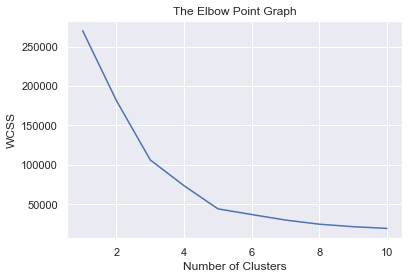

In [10]:
# plot an elbow graph

sns.set()
plt.plot(range(1,11), wcss)
plt.title('The Elbow Point Graph')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

Optimum Number of Clusters = 5
Training the k-Means Clustering Model

In [11]:
#after finding suitable cluster again train the model with this cluster value.
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=0) #initiation step can be differnt. but best one is,random sate ki value kuch b ho sakti hai 1 ,2 etc
# return a label for each data point based on their cluster
Y = kmeans.fit_predict(X)
print(Y)

[4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4
 3 4 3 4 3 4 1 4 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 2 0 2 1 2 0 2 0 2 1 2 0 2 0 2 0 2 0 2 1 2 0 2 0 2
 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2]


5 Clusters -  0, 1, 2, 3, 4

Visualizing all the Clusters

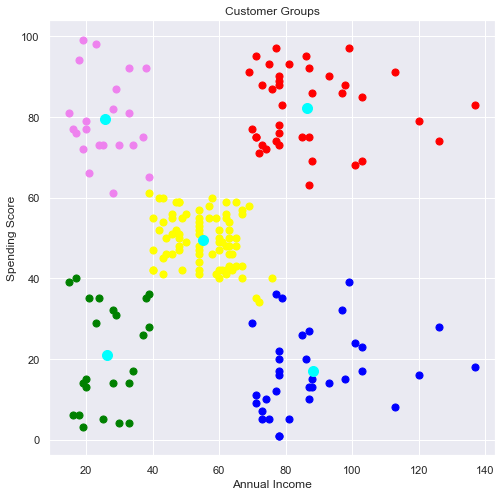

In [12]:
# plotting all the clusters and their Centroids

plt.figure(figsize=(8,8))
plt.scatter(X[Y==0,0], X[Y==0,1], s=50, c='blue', label='Cluster 1')
plt.scatter(X[Y==1,0], X[Y==1,1], s=50, c='yellow', label='Cluster 2')
plt.scatter(X[Y==2,0], X[Y==2,1], s=50, c='red', label='Cluster 3')
plt.scatter(X[Y==3,0], X[Y==3,1], s=50, c='violet', label='Cluster 4')
plt.scatter(X[Y==4,0], X[Y==4,1], s=50, c='green', label='Cluster 5')

# plot the centroids
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=100, c='cyan', label='Centroids')

plt.title('Customer Groups')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()

In [13]:
from sklearn.cluster import DBSCAN
clustring=DBSCAN(eps=8,min_samples=4)
db_clustering=clustring.fit(X)
cluster=db_clustering.labels_


In [14]:
len(set(cluster))

8

In [15]:
def show_cluster(X,cluster):
    df=pd.DataFrame(dict(x=X[:,0],y=X[:,1],label=cluster))
    colors={-1:'black',0:'blue',1:'yellow',2:'red',3:'violet',4:'green',5:'purple',6:'orange'}
    fig,ax = plt.subplots(figsize=(8,8))
    grouped=df.groupby('label')
    for key, group in grouped:
        group.plot(ax=ax,kind='scatter',x='x',y='y', label=key, color=colors[key])
    plt.title('Customer Groups')
    plt.xlabel('Annual Income')
    plt.ylabel('Spending Score')
    plt.show()


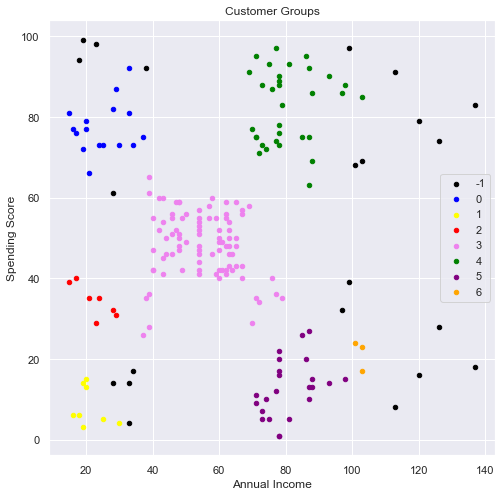

In [16]:
show_cluster(X, cluster)

black data point are the outlier 

In [17]:
from sklearn.cluster import AgglomerativeClustering

In [18]:
colors = ['royalblue','red','deeppink', 'maroon', 'mediumorchid', 'tan', 'forestgreen', 'olive', 'goldenrod', 'lightcyan', 'navy']
vectorizer = np.vectorize(lambda x: colors[x % len(colors)])


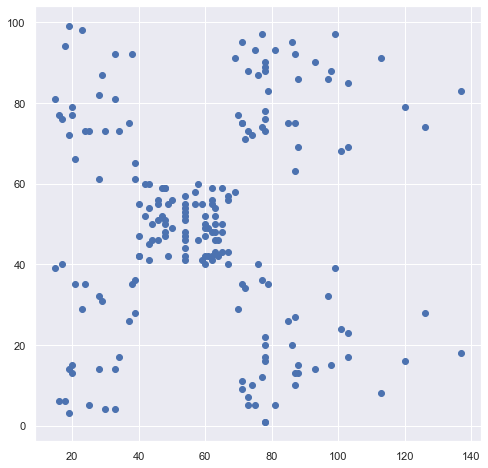

In [19]:
plt.figure(figsize=(8,8))
plt.scatter(X[:,0],X[:,1])

In [20]:
model = AgglomerativeClustering(linkage="single")
model = model.fit(X)
model.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0], dtype=int64)

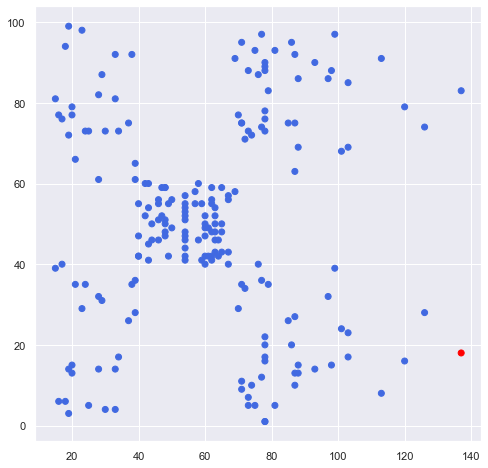

In [21]:
plt.figure(figsize=(8,8))
plt.scatter(X[:,0], X[:,1],c=vectorizer(model.labels_))

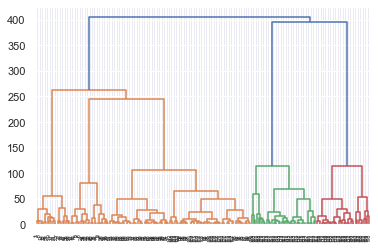

In [22]:
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt
Z = linkage(X, 'ward')
dn = dendrogram(Z)
plt.show()

In [23]:
def clust_plot(X,noise,c):
    model = AgglomerativeClustering(linkage="single",n_clusters=c)
    model = model.fit(X)
    ymin=model.labels_
    model = AgglomerativeClustering(linkage="complete",n_clusters=c)
    model = model.fit(X)
    ymax=model.labels_
    model = AgglomerativeClustering(linkage="average",n_clusters=c)
    model =model.fit(X)
    yavg=model.labels_
    model = AgglomerativeClustering(linkage="ward",n_clusters=c)
    model = model.fit(X)
    yward=model.labels_
    plt.figure(figsize=(8,8))
    plt.subplot(141)
    plt.gca().set_title('MIN')
    plt.scatter(X[:,0], X[:,1],c=vectorizer(ymin))
    plt.subplot(142)
    plt.gca().set_title('MAX')
    plt.scatter(X[:,0], X[:,1],c=vectorizer(ymax))
    plt.subplot(143)
    plt.gca().set_title('Average')
    plt.scatter(X[:,0], X[:,1],c=vectorizer(yavg))
    plt.subplot(144)
    plt.gca().set_title('Ward')
    plt.scatter(X[:,0], X[:,1],c=vectorizer(yward))

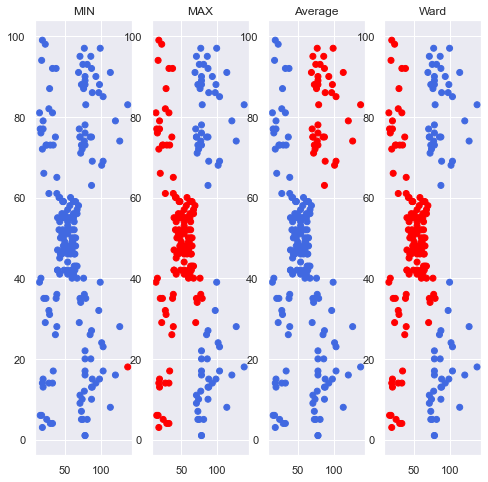

In [24]:
clust_plot(X,0,2)

In [25]:
import hdbscan

In [26]:
import hdbscan
cluster = hdbscan.HDBSCAN()  # create object
cluster.fit(X)

HDBSCAN()

In [27]:
cluster=cluster.labels_
cluster

array([-1,  3,  1,  3, -1,  3,  1, -1,  1,  3,  1, -1,  1,  3,  1,  3,  4,
       -1, -1, -1,  4,  3,  1,  3,  1,  3, -1, -1,  4, -1,  1,  3, -1, -1,
        1,  3, -1,  3, -1, -1,  4, -1,  4,  4, -1,  3,  4,  4,  4,  4,  4,
        4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,
        4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,
        4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,
        4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,
        4,  4,  4,  4,  0, -1,  0,  4,  0,  2,  0,  2,  0,  4,  0,  2,  0,
        2,  0,  2,  0,  2,  0,  4,  0,  2,  0,  4,  0,  2,  0,  2,  0,  2,
        0,  2,  0,  2,  0,  2,  0,  2,  0,  2,  0,  2,  0,  2,  0, -1, -1,
        2,  0,  2,  0,  2,  0,  2,  0,  2,  0, -1,  0,  2,  0, -1,  0, -1,
       -1, -1,  0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], dtype=int64)

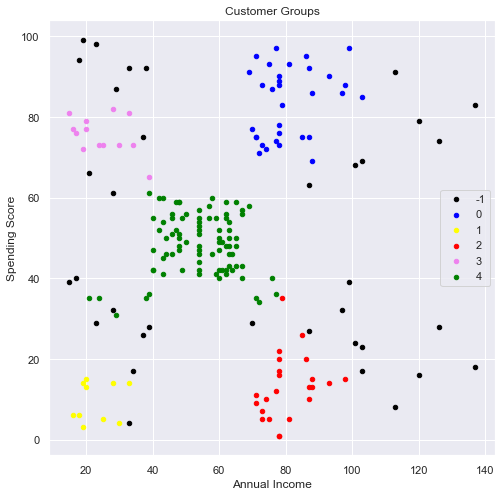

In [28]:
show_cluster(X, cluster)

black data points are outlier

In [29]:
!export PATH=/Library/TeX/texbin:$PATH 

'export' is not recognized as an internal or external command,
operable program or batch file.
